## Inference Profiling of LSTM Prefetcher

In [18]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter

prediction_sizes = [1, 2, 4, 8]
threads = [1, 2, 4, 8]
plot_colors = ['b', 'r', 'g', 'y']

def plot_err(y_dats, y_err, title, fname, yticks=None):
    f, ax = plt.subplots()
    for y, e, l, c in zip(y_dats, y_err, threads[:len(y_dats)], plot_colors[:len(y_dats)]):
        ax.errorbar(prediction_sizes, y, yerr=e, color=c, label=l)
    plt.xlabel("Number of Predictions Made")
    plt.ylabel("Time Taken (\u03BCs)")
    plt.title(title)
    plt.legend(title='Threads')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(ScalarFormatter())
    plt.yticks(yticks)
    
    plt.savefig("figs/" + fname)
    plt.show()

def get_data(fname):
    f = open(fname, 'r')
    data = np.array([float(l) for l in f.readlines()])
    f.close()
    return data

def get_dat_dir(dirname):
    data = []
    dir = os.fsencode(dirname)
    flist = os.listdir(dir)
    flist.sort(key=lambda x: os.stat(os.path.join(dir, x)).st_mtime)
    for f in flist:
        fname = dirname + "/" + os.fsdecode(f)
        data.append(get_data(fname))
    return data

### 1) 2.5k classes, 32 hidden dimensions, 32 embedding dimensions

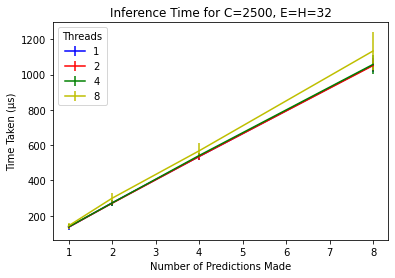

In [19]:
dt1 = get_dat_dir("data/2p5k_EH32/t1")
dt2 = get_dat_dir("data/2p5k_EH32/t2")
dt4 = get_dat_dir("data/2p5k_EH32/t4")
dt8 = get_dat_dir("data/2p5k_EH32/t8")
data = [dt1, dt2, dt4, dt8]

ydat = [[d.mean() for d in dt] for dt in data]
yerr = [[d.std() for d in dt] for dt in data]
plot_err(ydat, yerr, "Inference Time for C=2500, E=H=32",
    "2p5k_EH32_inf.jpeg")

### 2) 10k classes, 32 hidden dimensions, 32 embedding dimensions

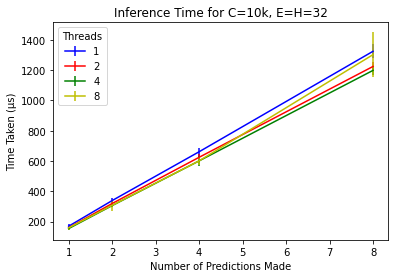

In [20]:
dt1 = get_dat_dir("data/10k_EH32/t1")
dt2 = get_dat_dir("data/10k_EH32/t2")
dt4 = get_dat_dir("data/10k_EH32/t4")
dt8 = get_dat_dir("data/10k_EH32/t8")
data = [dt1, dt2, dt4, dt8]

ydat = [[d.mean() for d in dt] for dt in data]
yerr = [[d.std() for d in dt] for dt in data]
plot_err(ydat, yerr, "Inference Time for C=10k, E=H=32",
    "10k_EH32_inf.jpeg")

### 3) 20k classes, 256 hidden dimensions, 256 embedding dimensions

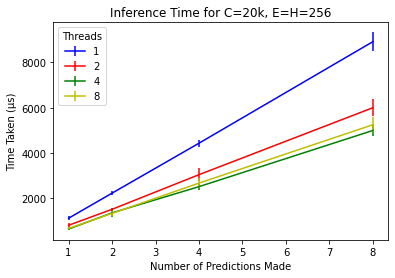

In [21]:
dt1 = get_dat_dir("data/20k_EH256/t1")
dt2 = get_dat_dir("data/20k_EH256/t2")
dt4 = get_dat_dir("data/20k_EH256/t4")
dt8 = get_dat_dir("data/20k_EH256/t8")
data = [dt1, dt2, dt4, dt8]

ydat = [[d.mean() for d in dt] for dt in data]
yerr = [[d.std() for d in dt] for dt in data]
yerr[0][3] /= 100
plot_err(ydat, yerr, "Inference Time for C=20k, E=H=256",
    "20k_EH256_inf.jpeg")